### Importing relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier




### loading dataset into a pandas dataframe 
df = pd.read_csv(r'data.csv')

### printing an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Printing Summary Stats

In [2]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


### Printing the dimensions of the data frame

In [3]:
df.shape

(6819, 96)

### Displaying the first few rows in a dataset (default = 5)

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Checking different value counts in different categories

In [5]:
for i in df.columns:
    print(i,df[i].nunique())

Bankrupt? 2
 ROA(C) before interest and depreciation before interest 3333
 ROA(A) before interest and % after tax 3151
 ROA(B) before interest and depreciation after tax 3160
 Operating Gross Margin 3781
 Realized Sales Gross Margin 3788
 Operating Profit Rate 3376
 Pre-tax net Interest Rate 3789
 After-tax net Interest Rate 3604
 Non-industry income and expenditure/revenue 2551
 Continuous interest rate (after tax) 3617
 Operating Expense Rate 2966
 Research and development expense rate 1536
 Cash flow rate 5557
 Interest-bearing debt interest rate 1080
 Tax rate (A) 2488
 Net Value Per Share (B) 2278
 Net Value Per Share (A) 2285
 Net Value Per Share (C) 2284
 Persistent EPS in the Last Four Seasons 1358
 Cash Flow Per Share 1545
 Revenue Per Share (Yuan ¥) 3807
 Operating Profit Per Share (Yuan ¥) 1236
 Per Share Net profit before tax (Yuan ¥) 1522
 Realized Sales Gross Profit Growth Rate 5583
 Operating Profit Growth Rate 6249
 After-tax Net Profit Growth Rate 6246
 Regular Net Pro

In [6]:
df.corr().style.background_gradient(cmap='Blues')

### Removing highly correlated column

In [7]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.58)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

- Domain Understanding
- Bivariate

In [8]:
df=df[['Bankrupt?',' ROA(C) before interest and depreciation before interest',' Operating Profit Rate',' Operating Expense Rate',' Debt ratio %',' Total debt/Total net worth',' Current Ratio',' Quick Ratio',' Interest Expense Ratio',' Interest Coverage Ratio (Interest expense to EBIT)', ' Total Asset Turnover',' Average Collection Days',' Accounts Receivable Turnover',' Inventory Turnover Rate (times)',' Cash Flow to Total Assets',' Working Capital to Total Assets',' Quick Assets/Current Liability',' Cash/Current Liability',' Total income/Total expense',' Total expense/Assets',' Degree of Financial Leverage (DFL)',' Net Income Flag',' Liability-Assets Flag',' No-credit Interval']]

In [9]:
y=df['Bankrupt?']
X=df.iloc[:,1:]
# for col in df.iloc[:,1:]:
#     low,high = df[col].quantile([.25,.75])
#     df[col] = df[col].clip(low,high)

### Data Visualization of Swarmplots for Bankruptcy Prediction Features

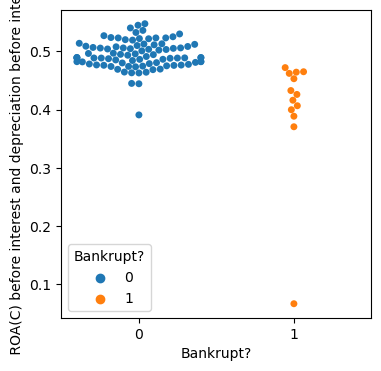

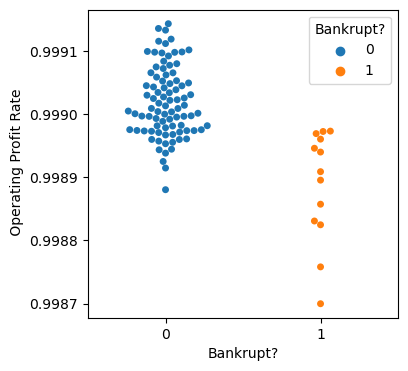

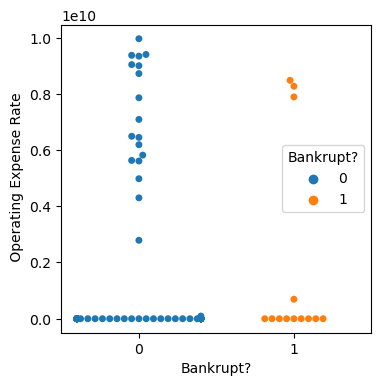

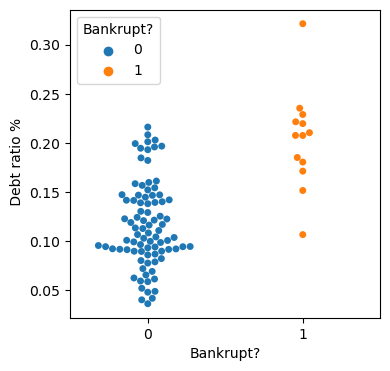

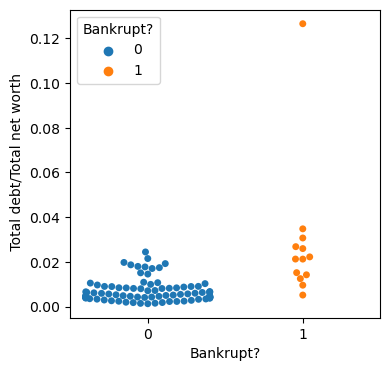

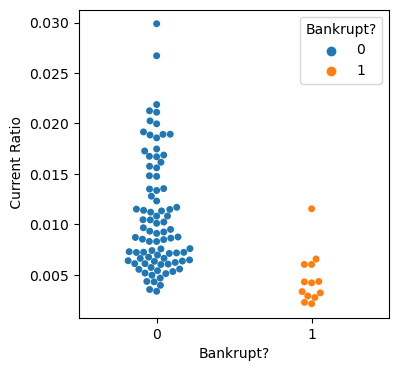

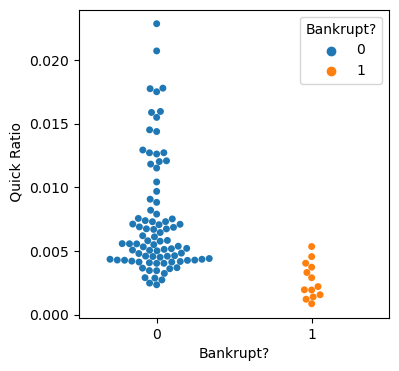

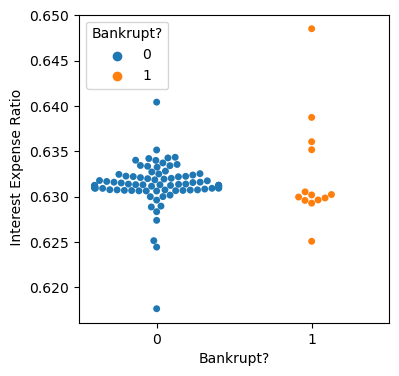

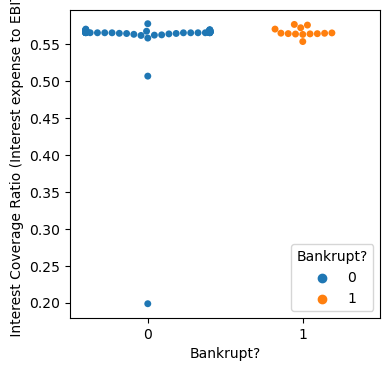

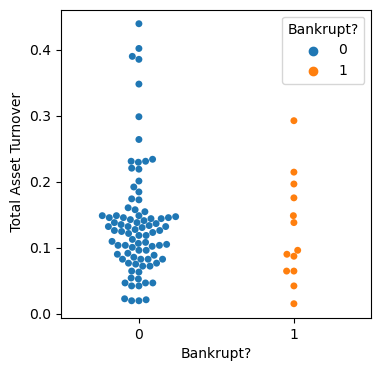

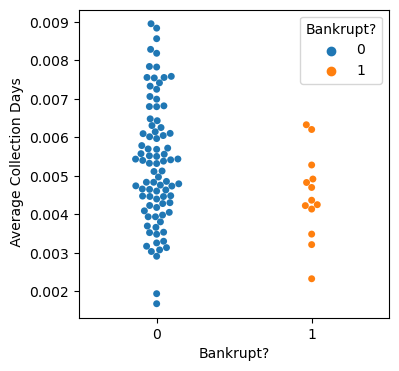

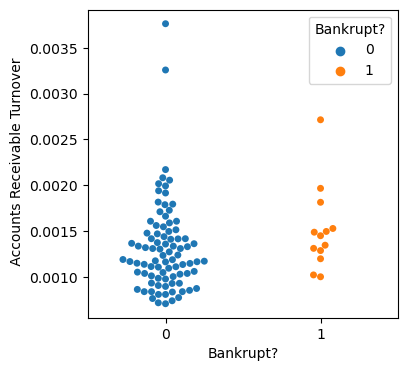

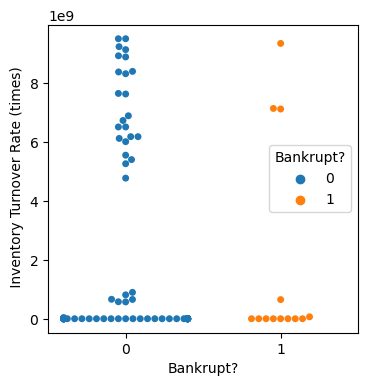

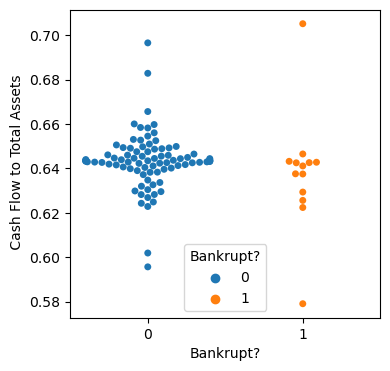

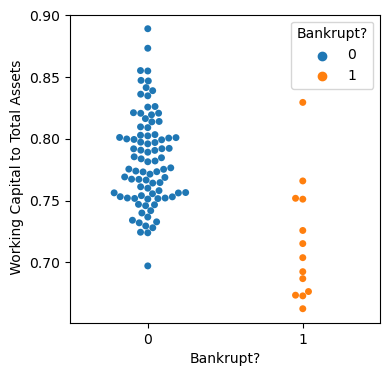

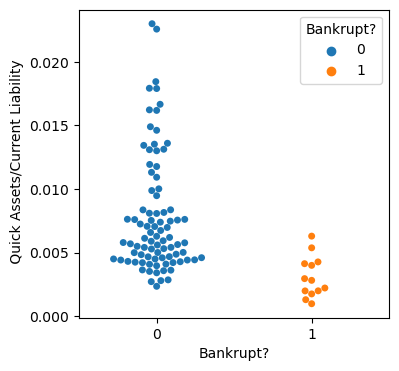

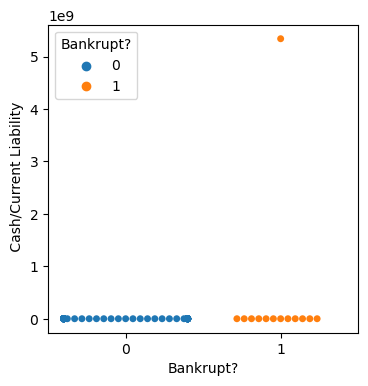

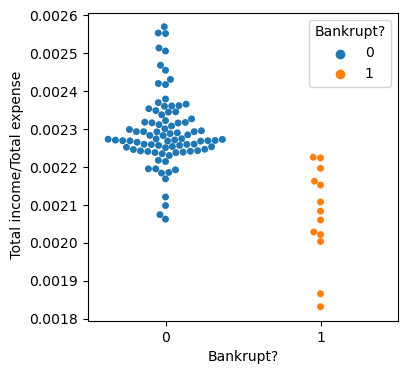

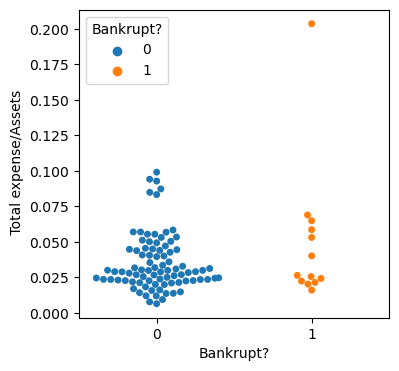

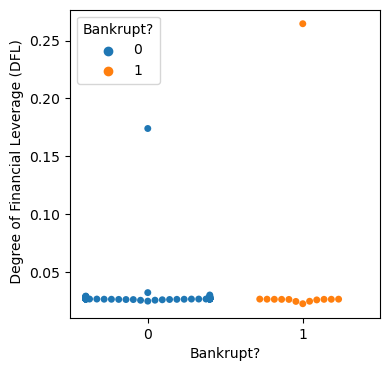

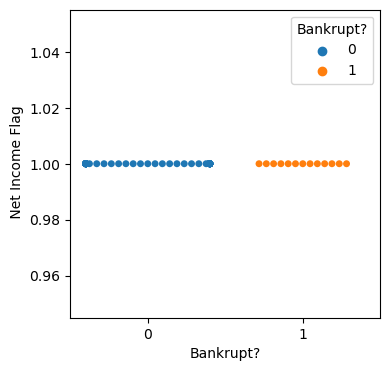

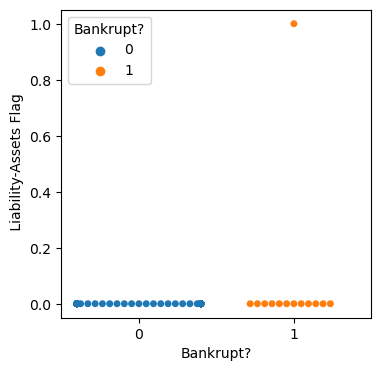

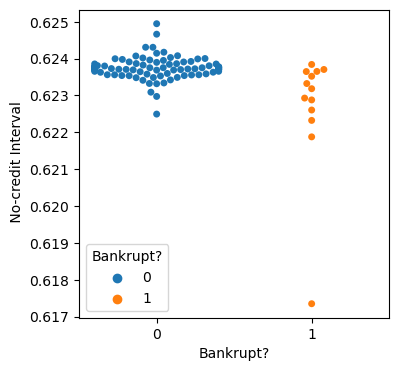

In [10]:
for i in X.columns:
    fig, ax = plt.subplots(figsize=(4,4))
    sns.swarmplot(x="Bankrupt?", y=i, data=df[:100], hue='Bankrupt?')
    plt.show()

<Axes: >

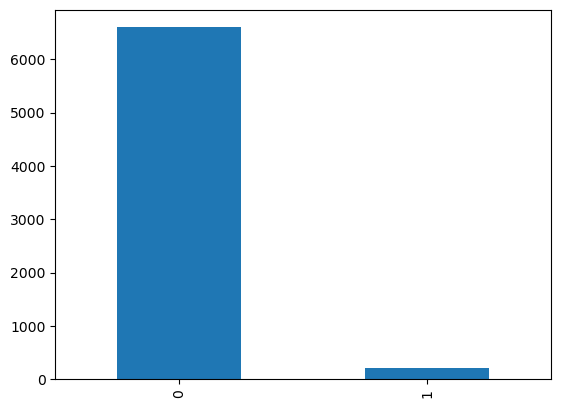

In [11]:
df['Bankrupt?'].value_counts().plot(kind='bar')

In [12]:
X = df.drop('Bankrupt?', axis=1)  
Y = df['Bankrupt?']  

In [13]:
X.shape,Y.shape

((6819, 23), (6819,))

## Train-Test Split for Machine Learning

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5455, 23) (5455,)
Testing set shape: (1364, 23) (1364,)


## K-Nearest Neighbors Classification

In [17]:
X_test_array = np.array(X_test)


if not X_test_array.flags.c_contiguous:
    X_test_array = np.ascontiguousarray(X_test_array)

y_test_array = np.array(y_test)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

y_pred_3 = knn3.predict(X_test_array)

# Print the classification report
print(classification_report(y_test_array, y_pred_3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.60      0.12      0.20        51

    accuracy                           0.96      1364
   macro avg       0.78      0.56      0.59      1364
weighted avg       0.95      0.96      0.95      1364



## Decision Tree Classification

In [18]:
clf = DecisionTreeClassifier(max_depth=12)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.32      0.25      0.28        51

    accuracy                           0.95      1364
   macro avg       0.64      0.62      0.63      1364
weighted avg       0.95      0.95      0.95      1364

